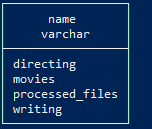

In [125]:
import pandas as pd
import gspread
import duckdb
import os
# DATABASE_PATH = "database/DDBB_duckdb.duckdb"
DATABASE_PATH = "database/ddbb_dirty.duckdb"
# DATABASE_PATH = "database/ddbb_duplicates.duckdb"

In [139]:
con = duckdb.connect(database=DATABASE_PATH, read_only=False)
df = con.execute("""

SELECT *,
CASE
WHEN correct_or_error_type LIKE '%Error%' THEN 'Error'
ELSE 'Correct'
END AS 'correct_or_error',
CASE
WHEN table_name = 'movies' THEN (
                                SELECT COUNT(*)
                                FROM (
                                      SELECT primary_title, original_title, COUNT(*)

                                      FROM movies

                                      GROUP BY primary_title, original_title

                                      HAVING COUNT(*) > 1
                                      )
                                )
WHEN table_name = 'directing' THEN (
                                SELECT COUNT(*)
                                FROM (
                                      SELECT director_id, movie_id, COUNT(*)

                                      FROM directing

                                      GROUP BY director_id, movie_id

                                      HAVING COUNT(*) > 1
                                      )
                                )
WHEN table_name = 'writing' THEN (
                                SELECT COUNT(*)
                                FROM (
                                      SELECT writer_id, movie_id, COUNT(*)

                                      FROM writing

                                      GROUP BY writer_id, movie_id

                                      HAVING COUNT(*) > 1
                                      )
                                )
ELSE 0
END AS 'duplicate_count'
FROM
(
   SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'writing' AS table_name,
    'writing.writer_id' AS Field,
    CASE
      WHEN writer_id IS NULL THEN 'null_Error'
      WHEN NOT regexp_matches(writer_id,'^nm[0-9]{6,10}$') THEN 'string_format_Error'
    ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    writing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type


UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'writing' AS table_name,
    'writing.movie_id' AS Field,
    CASE
      WHEN movie_id IS NULL THEN 'null_Error'
      WHEN NOT regexp_matches(movie_id,'^tt[0-9]{6,10}$') THEN 'string_format_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    writing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type
                 
UNION ALL
                 
SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'writing' AS table_name,
    'writing.audit_time' AS Field,
    CASE
      WHEN audit_time IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    writing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL
                 
SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'directing' AS table_name,
    'directing.director_id' AS Field,
    CASE
      WHEN director_id IS NULL THEN 'null_Error'
      WHEN NOT regexp_matches(director_id,'^nm[0-9]{6,10}$') THEN 'string_format_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    directing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'directing' AS table_name,
    'directing.movie_id' AS Field,
    CASE
      WHEN movie_id IS NULL THEN 'null_Error'
      WHEN NOT regexp_matches(movie_id,'^tt[0-9]{6,10}$') THEN 'string_format_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    directing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'directing' AS table_name,
    'directing.audit_time' AS Field,
    CASE
      WHEN audit_time IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    directing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type
                 

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,            
    'movies.movie_id' AS Field,
    CASE
      WHEN movie_id IS NULL THEN 'null_Error'
      WHEN NOT regexp_matches(movie_id,'^tt[0-9]{6,10}$') THEN 'string_format_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.primary_title' AS Field,
    CASE
      WHEN primary_title IS NULL THEN 'null_Error'
      WHEN LEN(primary_title) < 3 OR LEN(primary_title) > 100 OR original_title IN ('nan','null','Nan','NaN') THEN 'string_format_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.original_title' AS Field,
    CASE
      WHEN original_title IS NULL THEN 'null_Error'
      WHEN LEN(original_title) < 3 OR LEN(original_title) > 100 OR original_title IN ('nan','null','Nan','NaN') THEN 'string_format_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.start_year' AS Field,
    CASE
      WHEN start_year IS NULL THEN 'null_Error'
      WHEN start_year < 1888 THEN 'value_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type
                 
UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.runtime_min' AS Field,
    CASE
      WHEN runtime_min IS NULL THEN 'null_Error'
      WHEN runtime_min < 40 THEN 'value_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.num_votes' AS Field,
    CASE
      WHEN num_votes IS NULL THEN 'null_Error'
      WHEN num_votes < 0 THEN 'value_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.label' AS Field,
    CASE
      WHEN label IS NULL THEN 'null_Error'
      WHEN label NOT IN ('False','True') THEN 'string_format_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.subset' AS Field,
    CASE
      WHEN subset IS NULL THEN 'null_Error'
      WHEN subset NOT IN ('val','train','test') THEN 'string_format_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.title_changed' AS Field,
    CASE
      WHEN title_changed IS NULL THEN 'null_Error'
      WHEN title_changed NOT IN ('True', 'False') THEN 'string_format_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.title_length' AS Field,
    CASE
      WHEN title_length IS NULL THEN 'null_Error'
      WHEN title_length < 3 OR title_length > 100 THEN 'value_Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error_type,
  COUNT(correct_or_error_type) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.audit_time' AS Field,
    CASE
      WHEN audit_time IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error_type
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error_type


 
)



""").fetch_df()
con.close()
df

,Field,table_name,correct_or_error_type,Count,correct_or_error,duplicate_count
0,writing.writer_id,writing,Correct,22131,Correct,0
1,writing.movie_id,writing,Correct,22131,Correct,0
2,writing.audit_time,writing,Correct,22131,Correct,0
3,directing.director_id,directing,Correct,11160,Correct,0
4,directing.movie_id,directing,Correct,11160,Correct,0
5,directing.audit_time,directing,Correct,11160,Correct,0
6,movies.movie_id,movies,Correct,10000,Correct,71
7,movies.primary_title,movies,string_format_Error,26,Error,71
8,movies.primary_title,movies,Correct,9974,Correct,71
9,movies.original_title,movies,Correct,4985,Correct,71


In [154]:
gc = gspread.service_account(filename = 'superb-flag-373214-1f46ff6114b3.json' )
sh = gc.open_by_key('1QtK3ywIe8yW8UK4VVxMQ3P7lzTX_rWaVXkwZqsL55j4') 
sheet1 = sh.sheet1
sheet1.update([df.columns.values.tolist()]+ df.values.tolist())

In [160]:
# new_row = {
#     'Field': 'movies.audit_time',
#     'table_name': 'movies',
#     'correct_or_error_type': 'value_Error',
#     'Count': 10000,
#     'correct_or_error': 'Error',
#     'duplicate_count': 71
# }

# # Appending the new row to the DataFrame
# df = df.append(new_row, ignore_index=True)

C:\Users\leona\AppData\Local\Temp\ipykernel_10056\898220183.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
